In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')

In [5]:
print(df.columns)

Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk'],
      dtype='object')


In [6]:
print(df.head())

   Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0         0.0                  0.0      0.0           1.0        0.0   
1         0.0                  1.0      0.0           1.0        0.0   
2         1.0                  0.0      0.0           1.0        0.0   
3         1.0                  1.0      0.0           1.0        0.0   
4         0.0                  0.0      1.0           0.0        1.0   

   Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0       0.0                 0.0                 0.0      0.0   
1       0.0                 0.0                 0.0      1.0   
2       0.0                 0.0                 0.0      1.0   
3       0.0                 1.0                 1.0      1.0   
4       0.0                 0.0                 0.0      0.0   

   High_Cholesterol  Diabetes  Smoking  Obesity  Sedentary_Lifestyle  \
0               0.0       0.0      1.0      0.0                  1.0   
1               0.0       0.0      1.0

In [7]:
print(df.isnull().sum())

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64


In [8]:
print(df.describe())

         Chest_Pain  Shortness_of_Breath       Fatigue  Palpitations  \
count  70000.000000         70000.000000  70000.000000  70000.000000   
mean       0.499229             0.500586      0.498571      0.498729   
std        0.500003             0.500003      0.500002      0.500002   
min        0.000000             0.000000      0.000000      0.000000   
25%        0.000000             0.000000      0.000000      0.000000   
50%        0.000000             1.000000      0.000000      0.000000   
75%        1.000000             1.000000      1.000000      1.000000   
max        1.000000             1.000000      1.000000      1.000000   

          Dizziness      Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  \
count  70000.000000  70000.000000        70000.000000        70000.000000   
mean       0.501414      0.498929            0.501500            0.502457   
std        0.500002      0.500002            0.500001            0.499998   
min        0.000000      0.000000          

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

/var/folders/6j/p80x1lhd1_n3c6lhm70_t7c80000gn/T/ipykernel_15140/3989731939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Heart_Risk'], y=df['Age'], palette="Set2")


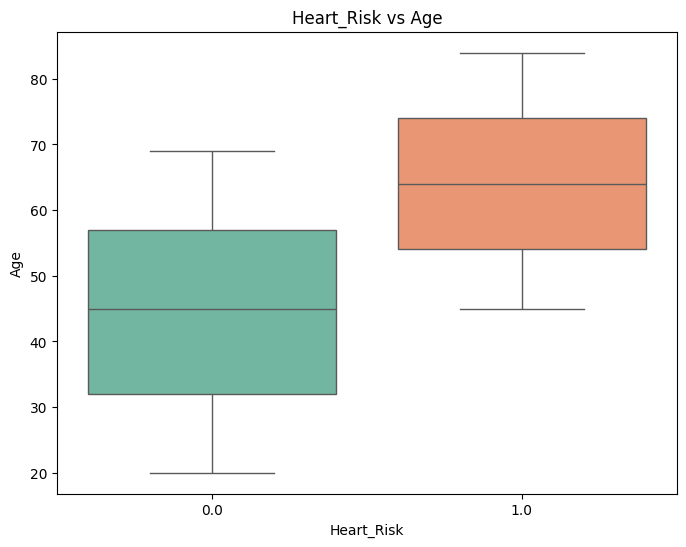

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Heart_Risk'], y=df['Age'], palette="Set2")
plt.xlabel("Heart_Risk")
plt.ylabel("Age")
plt.title("Heart_Risk vs Age")
plt.show()

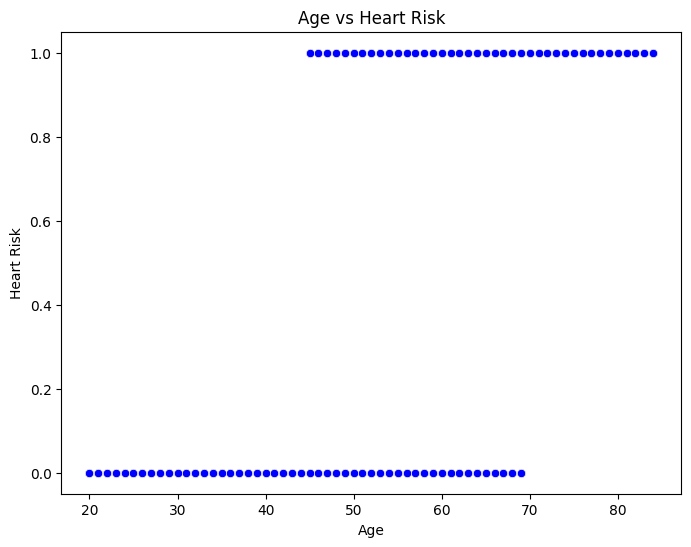

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Heart_Risk'], color="blue")
plt.xlabel("Age")
plt.ylabel("Heart Risk")
plt.title("Age vs Heart Risk")
plt.show()

In [12]:
X=df[['Age']]
y=df['Heart_Risk']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print(f"Intercept (b): {model.intercept_:.2f}")
print(f"Coefficient (m): {model.coef_[0]:.2f}")

Intercept (b): -0.50
Coefficient (m): 0.02


In [17]:
Y_pred = model.predict(X_test)

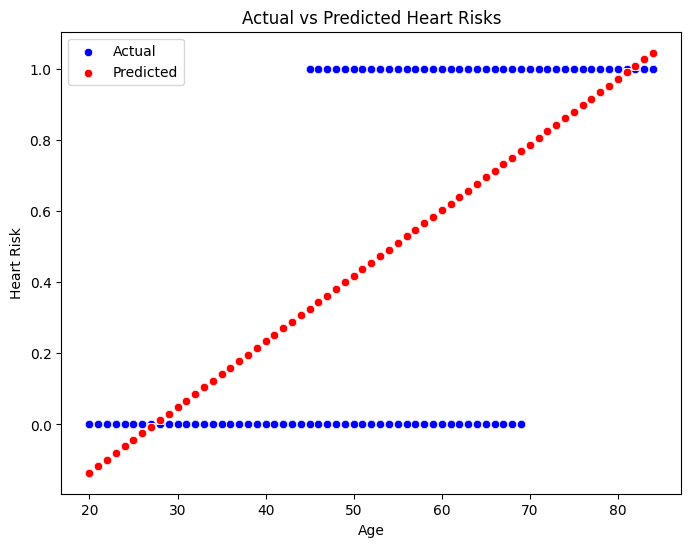

In [18]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=X_test.values.flatten(), y=y_test.values.flatten(), color="blue", label="Actual")

sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel("Age")
plt.ylabel("Heart Risk")
plt.title("Actual vs Predicted Heart Risks")
plt.legend()
plt.show()

In [19]:
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.16


In [20]:
r2 = r2_score(y_test, Y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.37


In [21]:
heart_risk_variance = np.var(y_test)
print(f"Heart Risk Variance {heart_risk_variance:.2f}")

Heart Risk Variance 0.25
